# Object Detection with TensorFlow object detection model

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/Data/6


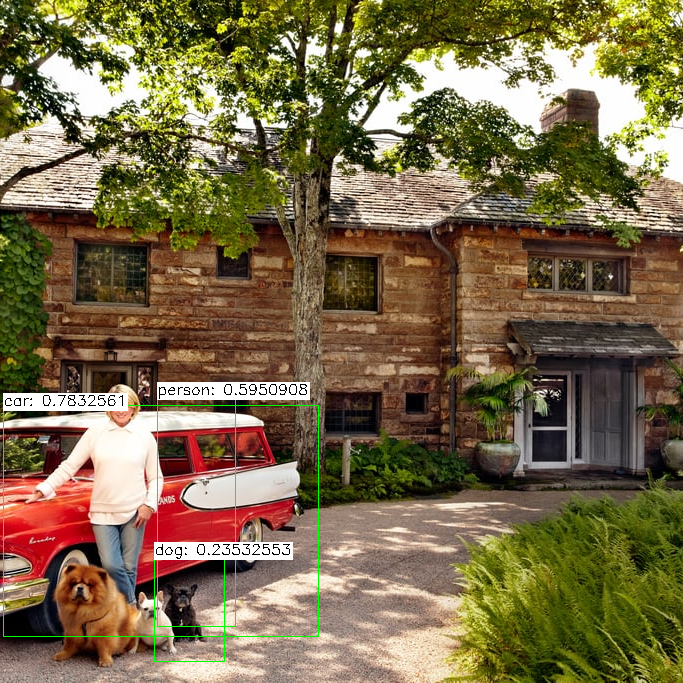

In [16]:
%cd '/content/drive/MyDrive/Data/6'
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

frame = cv2.imread('./images/house.jpg')

inWidth = 300
inHeight = 300
WHRatio = inWidth / float(inHeight)
inScaleFactor = 0.007843
meanVal = 127.5

Caffe = False 

if Caffe:
    prototxt = "MobileNetSSD_deploy.prototxt"
    weights = "MobileNetSSD_deploy.caffemodel"
    num_classes = 20
else:
    prototxt = "ssd_mobilenet_v1_coco.pbtxt"
    weights = "/content/drive/MyDrive/Data/6/frozen_inference_graph/frozen_inference_graph.pb"
    num_classes = 90
thr = 0.2

if num_classes == 20:
    net = cv2.dnn.readNetFromCaffe(prototxt, weights)
    swapRB = False
    classNames = { 0: 'background',
        1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
        5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair',
        10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse',
        14: 'motorbike', 15: 'person', 16: 'pottedplant',
        17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }
else:
    assert(num_classes == 90)
    net = cv2.dnn.readNetFromTensorflow(weights, prototxt)
    swapRB = True
    classNames = { 0: 'background',
        1: 'person', 2: 'bicycle', 3: 'truck', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
        7: 'train', 8: 'car', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
        13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
        18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
        24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
        32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
        37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
        41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
        46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
        51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
        56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
        61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
        67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
        75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
        80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
        86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush' }

    
    blob = cv2.dnn.blobFromImage(frame, inScaleFactor, (inWidth, inHeight), (meanVal, meanVal, meanVal), swapRB)
    net.setInput(blob)
    detections = net.forward()

    cols = frame.shape[1]
    rows = frame.shape[0]

    if cols / float(rows) > WHRatio:
        cropSize = (int(rows * WHRatio), rows)
    else:
        cropSize = (cols, int(cols / WHRatio))

    y1 = int((rows - cropSize[1]) / 2)
    y2 = y1 + cropSize[1]
    x1 = int((cols - cropSize[0]) / 2)
    x2 = x1 + cropSize[0]
    frame = frame[y1:y2, x1:x2]

    cols = frame.shape[1]
    rows = frame.shape[0]

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > thr:
            class_id = int(detections[0, 0, i, 1])

            xLeftBottom = int(detections[0, 0, i, 3] * cols)
            yLeftBottom = int(detections[0, 0, i, 4] * rows)
            xRightTop   = int(detections[0, 0, i, 5] * cols)
            yRightTop   = int(detections[0, 0, i, 6] * rows)

            cv2.rectangle(frame, (xLeftBottom, yLeftBottom), (xRightTop, yRightTop),
                          (0, 255, 0))
            if class_id in classNames:
                label = classNames[class_id] + ": " + str(confidence)
                labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

                yLeftBottom = max(yLeftBottom, labelSize[1])
                cv2.rectangle(frame, (xLeftBottom, yLeftBottom - labelSize[1]),
                                     (xLeftBottom + labelSize[0], yLeftBottom + baseLine),
                                     (255, 255, 255), cv2.FILLED)
                cv2.putText(frame, label, (xLeftBottom, yLeftBottom),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    cv2_imshow(frame)
    cv2.waitKey(0)      
cv2.destroyAllWindows()